1. Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Charger le jeu de données (en supposant qu'il s'agit d'un fichier CSV)

In [2]:
df = pd.read_csv(r"C:\Users\zeeko\Desktop\python\films.csv")

3. Exploration des données

In [3]:
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10
print("Affiche les 5 premières lignes du DataFrame")
print(df.head()) 

Affiche les 5 premières lignes du DataFrame
                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a

In [4]:
# Donne des informations générales (nombre de lignes, types de colonnes, valeurs manquantes)
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB
None


In [5]:
# Statistiques de base pour les colonnes numériques (ex: moyenne, min, max)
print(df.describe())


            rating
count  8784.000000
mean      6.764515
std       1.214840
min       1.700000
25%       6.100000
50%       6.900000
75%       7.600000
max       9.900000


In [6]:
# Affiche le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64


4. Manipulation des données

In [7]:
# Sélection de certaines colonnes
df_subset = df[['title', 'year', 'rating', 'votes']]
print(df_subset)

                       title         year  rating    votes
0                  Cobra Kai     (2018– )     8.5  177,031
1                  The Crown     (2016– )     8.7  199,885
2           Better Call Saul  (2015–2022)     8.9  501,384
3              Devil in Ohio       (2022)     5.9    9,773
4     Cyberpunk: Edgerunners     (2022– )     8.6   15,413
...                      ...          ...     ...      ...
9952          The Imperfects     (2022– )     6.3    3,130
9953        The Walking Dead  (2010–2022)     8.1  970,067
9954               The Crown     (2016– )     8.7  199,898
9955            Supernatural  (2005–2020)     8.4  439,601
9956           Devil in Ohio       (2022)     5.9    9,786

[9957 rows x 4 columns]


In [8]:
# Filtrer les films avec une note supérieure à 8.0
high_rated = df[df['rating'] > 8.0]
print(high_rated)

                       title         year certificate duration  \
0                  Cobra Kai     (2018– )       TV-14   30 min   
1                  The Crown     (2016– )       TV-MA   58 min   
2           Better Call Saul  (2015–2022)       TV-MA   46 min   
4     Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   
6             Rick and Morty     (2013– )       TV-MA   23 min   
...                      ...          ...         ...      ...   
9948         Stranger Things     (2016– )       TV-14   51 min   
9951            Breaking Bad  (2008–2013)       TV-MA   49 min   
9953        The Walking Dead  (2010–2022)       TV-MA   44 min   
9954               The Crown     (2016– )       TV-MA   58 min   
9955            Supernatural  (2005–2020)       TV-14   44 min   

                             genre  rating  \
0            Action, Comedy, Drama     8.5   
1        Biography, Drama, History     8.7   
2                     Crime, Drama     8.9   
4     Animation, Action

In [9]:

# Fonction pour convertir une durée en minutes (ex: '2h 30min' → 150)
import re

def duration_to_minutes(text):
    match = re.findall(r'(\d+)h\s*(\d*)min*', str(text))
    if match:
        hours = int(match[0][0])
        minutes = int(match[0][1]) if match[0][1] else 0
        return hours * 60 + minutes
    return None

# Application de la fonction à la colonne 'duration'
df['duration_min'] = df['duration'].apply(duration_to_minutes)

# Trier les films par nombre de votes (du plus au moins)
df_sorted = df.sort_values(by='votes', ascending=False)
print(df_sorted)


                                  title      year certificate duration  \
8661           JoJo's Bizarre Adventure  (2012– )       TV-MA   25 min   
3005  Life After Death with Tyler Henry  (2022– )       TV-MA   45 min   
6840                   Mortified Nation    (2013)         NaN   84 min   
5039                            Santana    (2020)       TV-MA  106 min   
4923                                Gie    (2005)   Not Rated  147 min   
...                                 ...       ...         ...      ...   
9752                         Hey Duggee  (2014– )        TV-Y    8 min   
9802                         Hey Duggee  (2014– )        TV-Y    8 min   
9813            Oni: Thunder God's Tale  (2022– )       TV-Y7      NaN   
9842                  Hollywood Insider  (2018– )         NaN      NaN   
9843                  Hollywood Insider  (2018– )         NaN      NaN   

                             genre  rating  \
8661  Animation, Action, Adventure     9.0   
3005               

5. Analyse statistique

In [10]:
# Calcul de la moyenne des notes
print("Moyenne des notes:", df['rating'].mean()) 

Moyenne des notes: 6.764515027322403


In [11]:
# Calcul de la médiane
print("Médiane des notes:", df['rating'].median()) 

Médiane des notes: 6.9


In [12]:
# Calcul de l’écart-type
print("Écart-type des notes:", df['rating'].std()) 

Écart-type des notes: 1.2148399889676755


In [13]:
# Moyenne des notes par genre
mean_by_genre = df.groupby('genre')['rating'].mean()
print(mean_by_genre)

genre
Action                          5.261905
Action, Adventure               6.800000
Action, Adventure, Biography    7.000000
Action, Adventure, Comedy       6.927160
Action, Adventure, Crime        6.369048
                                  ...   
Talk-Show                       6.941667
Thriller                        5.108511
Thriller, Mystery                    NaN
Western                         6.460000
Western, Adventure              6.150000
Name: rating, Length: 569, dtype: float64


6. Visualisation des données

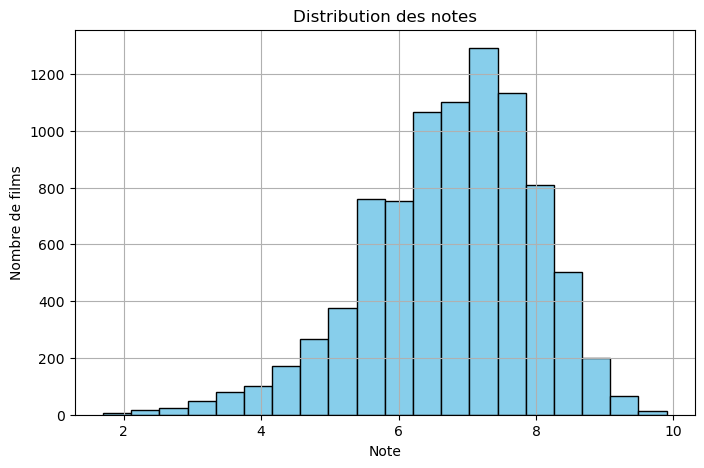

In [14]:
# Histogramme de la distribution des notes
plt.figure(figsize=(8,5))
df['rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Nombre de films')
plt.show()


on utilise juste 100 exemple de data


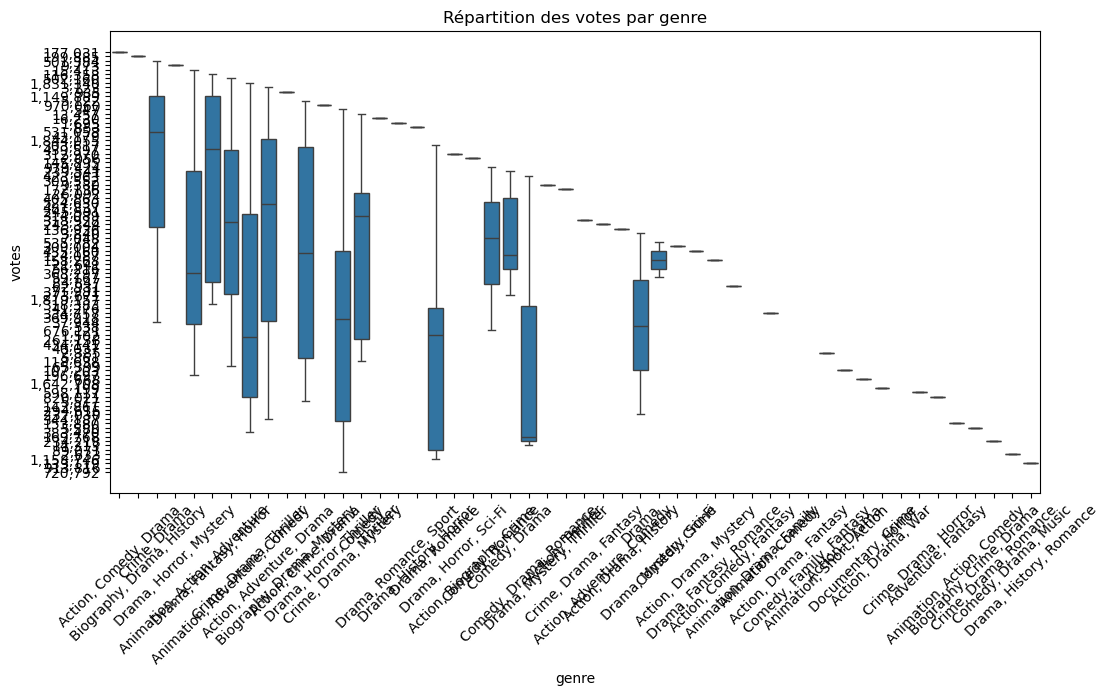

In [15]:
newdata=df.iloc[:100,:]

# Boxplot des votes par genre
print("on utilise juste 100 exemple de data")
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='votes', data=newdata)
plt.xticks(rotation=45)
plt.title('Répartition des votes par genre')
plt.show()


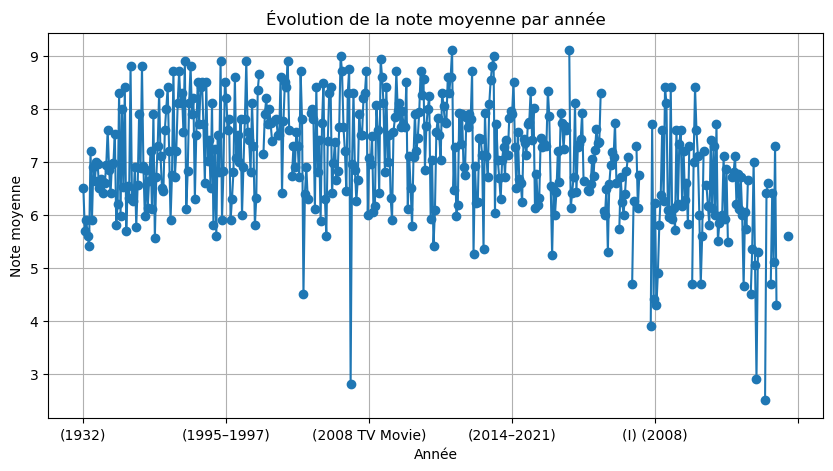

In [16]:
# Courbe des notes moyennes par année
# On regroupe les données par année et on calcule la moyenne des notes
mean_rating_by_year = df.groupby('year')['rating'].mean()

# On trace la courbe
mean_rating_by_year.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Évolution de la note moyenne par année')
plt.xlabel('Année')
plt.ylabel('Note moyenne')
plt.grid(True)
plt.show()


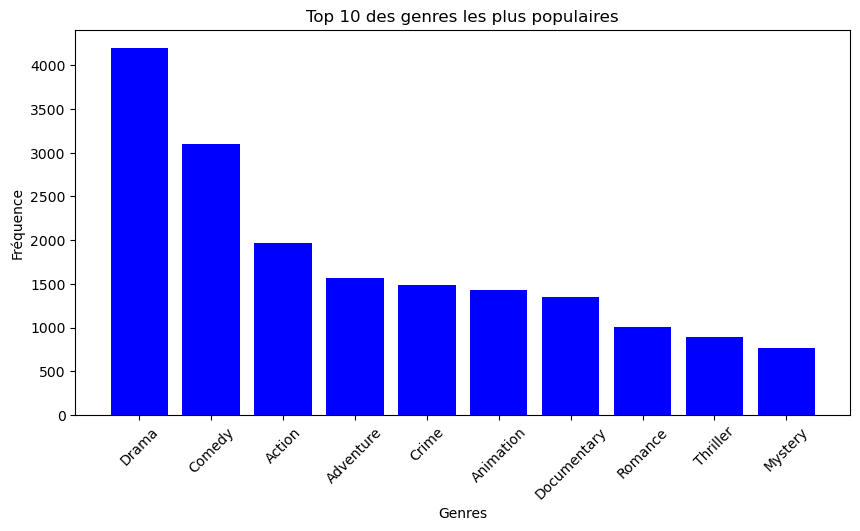

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

# S'assurer que la colonne 'genre' est une chaîne de caractères et gérer les valeurs manquantes
df["genre"] = df["genre"].fillna("").astype(str)

# Compter les occurrences des genres
compteur_genres = Counter([genre.strip() for sous_liste in df["genre"] for genre in sous_liste.split(',')])

# Obtenir les 10 genres les plus populaires
top_genres = compteur_genres.most_common(10)
genres, frequences = zip(*top_genres)

# Tracer le graphique des genres les plus populaires
plt.figure(figsize=(10, 5))
plt.bar(genres, frequences, color='blue')
plt.xlabel("Genres")
plt.ylabel("Fréquence")
plt.title("Top 10 des genres les plus populaires")
plt.xticks(rotation=45)
plt.show()

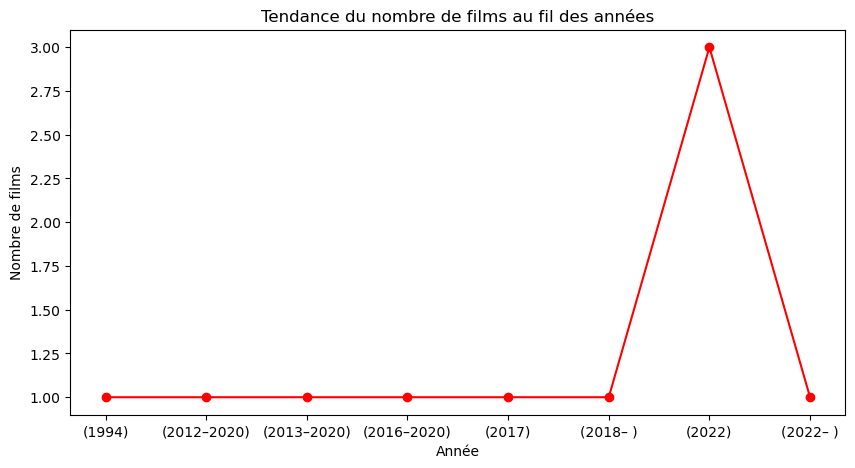

In [18]:
# Tendance du nombre de films au fil des années
ndata=df.iloc[160:170,:]
nombre_par_annee = ndata["year"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(nombre_par_annee.index, nombre_par_annee.values, marker='o', linestyle='-', color='red')
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.title("Tendance du nombre de films au fil des années")
plt.show()

7. Affichage des meilleurs films par genre"

In [19]:
# Top 10 des films les mieux notés
films_mieux_notes = df.sort_values(by="rating", ascending=False).head(10)
print("Top 10 des films les mieux notés :")
print(films_mieux_notes[["title", "rating"]])

Top 10 des films les mieux notés :
                           title  rating
9444             BoJack Horseman     9.9
9578             Stranger Things     9.6
8161  Avatar: The Last Airbender     9.6
17                          1899     9.6
8259                      Dexter     9.6
8557    JoJo's Bizarre Adventure     9.6
8907  Avatar: The Last Airbender     9.6
8044  Avatar: The Last Airbender     9.5
9445             BoJack Horseman     9.5
9586  Avatar: The Last Airbender     9.5


In [20]:
# Fonction pour obtenir les meilleurs films selon un genre
def meilleurs_films_par_genre(nom_genre, top_n=5):
    """
    Renvoie les top N meilleurs films d’un genre donné, triés par note décroissante.
    Ignore les lignes sans genre.
    """
    films_filtres = df[df["genre"].apply(lambda x: isinstance(x, str) and nom_genre in x)]
    return films_filtres.sort_values(by="rating", ascending=False).head(top_n)[["title", "genre", "rating"]]

In [21]:
print("Top 5 des films d'action :")
print(meilleurs_films_par_genre("Action"))

Top 5 des films d'action :
                           title                         genre  rating
8161  Avatar: The Last Airbender  Animation, Action, Adventure     9.6
8557    JoJo's Bizarre Adventure  Animation, Action, Adventure     9.6
8907  Avatar: The Last Airbender  Animation, Action, Adventure     9.6
8044  Avatar: The Last Airbender  Animation, Action, Adventure     9.5
9586  Avatar: The Last Airbender  Animation, Action, Adventure     9.5


In [22]:
print("Top 5 des films d'horreur :")
print(meilleurs_films_par_genre("Horror"))

Top 5 des films d'horreur :
                title                   genre  rating
17               1899  Drama, History, Horror     9.6
9578  Stranger Things  Drama, Fantasy, Horror     9.6
9575  Stranger Things  Drama, Fantasy, Horror     9.4
9000      The Sandman  Drama, Fantasy, Horror     9.2
10    Stranger Things  Drama, Fantasy, Horror     8.7


In [23]:
print("Top 5 des films dramatiques :")
print(meilleurs_films_par_genre("Drama"))

Top 5 des films dramatiques :
                title                     genre  rating
9444  BoJack Horseman  Animation, Comedy, Drama     9.9
17               1899    Drama, History, Horror     9.6
8259           Dexter     Crime, Drama, Mystery     9.6
9578  Stranger Things    Drama, Fantasy, Horror     9.6
9608   Anne with an E             Drama, Family     9.5


In [24]:
print("Top 5 des films de comédie :")
print(meilleurs_films_par_genre("Comedy"))

Top 5 des films de comédie :
                title                         genre  rating
9444  BoJack Horseman      Animation, Comedy, Drama     9.9
9445  BoJack Horseman      Animation, Comedy, Drama     9.5
9080   Rick and Morty  Animation, Adventure, Comedy     9.4
8618        Cobra Kai         Action, Comedy, Drama     9.4
9436  BoJack Horseman      Animation, Comedy, Drama     9.3


In [25]:
print("Top 5 des films d’animation :")
print(meilleurs_films_par_genre("Animation"))

Top 5 des films d’animation :
                           title                         genre  rating
9444             BoJack Horseman      Animation, Comedy, Drama     9.9
8557    JoJo's Bizarre Adventure  Animation, Action, Adventure     9.6
8907  Avatar: The Last Airbender  Animation, Action, Adventure     9.6
8161  Avatar: The Last Airbender  Animation, Action, Adventure     9.6
9586  Avatar: The Last Airbender  Animation, Action, Adventure     9.5


In [26]:
print("Top 5 des films biographiques :")
print(meilleurs_films_par_genre("Biography"))

Top 5 des films biographiques :
                                         title  \
634                             The Last Dance   
2376  David Attenborough: A Life on Our Planet   
549                           When They See Us   
140                                     Narcos   
1                                    The Crown   

                                genre  rating  
634   Documentary, Biography, History     9.1  
2376           Documentary, Biography     8.9  
549           Biography, Crime, Drama     8.9  
140           Biography, Crime, Drama     8.8  
1           Biography, Drama, History     8.7  


In [27]:
print("Top 5 des films romantiques :")
print(meilleurs_films_par_genre("Romance"))

Top 5 des films romantiques :
          title            genre  rating
9897  Chocolate   Drama, Romance     9.1
9894  Chocolate   Drama, Romance     9.0
9895  Chocolate   Drama, Romance     8.9
9932    Friends  Comedy, Romance     8.9
9899  Chocolate   Drama, Romance     8.9


In [28]:
print("Top 5 des films historiques :")
print(meilleurs_films_par_genre("History"))

Top 5 des films historiques :
                                title                            genre  rating
17                               1899           Drama, History, Horror     9.6
3322  Elesin Oba: The King's Horseman        Adventure, Drama, History     9.4
9529                 The Last Kingdom           Action, Drama, History     9.3
634                    The Last Dance  Documentary, Biography, History     9.1
943                   The Vietnam War        Documentary, History, War     9.1


In [29]:
print("Top 5 des films criminels :")
print(meilleurs_films_par_genre("Crime"))

Top 5 des films criminels :
             title                   genre  rating
8259        Dexter   Crime, Drama, Mystery     9.6
9951  Breaking Bad  Crime, Drama, Thriller     9.5
7     Breaking Bad  Crime, Drama, Thriller     9.5
8819          Dark   Crime, Drama, Mystery     9.5
8821          Dark   Crime, Drama, Mystery     9.4


In [30]:
print("Top 5 des films de guerre :")
print(meilleurs_films_par_genre("War"))

Top 5 des films de guerre :
                                  title                      genre  rating
943                     The Vietnam War  Documentary, History, War     9.1
2675  Greatest Events of WWII in Colour  Documentary, History, War     8.7
79       All Quiet on the Western Front         Action, Drama, War     8.3
4349                Zeitgeist: Addendum  Documentary, History, War     8.2
4254        21 Sarfarosh Saragarhi 1897               History, War     8.2


In [31]:
print("Top 5 des films familiaux :")
print(meilleurs_films_par_genre("Family"))


Top 5 des films familiaux :
               title                  genre  rating
9608  Anne with an E          Drama, Family     9.5
9460  Anne with an E          Drama, Family     9.2
1209      Reply 1988  Comedy, Drama, Family     9.2
1314       My Mister          Drama, Family     9.1
9528  Anne with an E          Drama, Family     9.1
